In [1]:
import matplotlib.pyplot as plt
import numpy as np

# part1

In [2]:
day18_inputs = "inputs/day18.txt"

with open(day18_inputs) as file:
    day18_instructions = file.readlines()

In [3]:
initial_config = [list(row.strip().replace("#", "1").replace(".", "0")) for row in day18_instructions]
initial_config_array = np.array(initial_config)

In [4]:
def surrounding(x, idx, radius=1, fill=-1):        
    if np.isscalar(radius): 
        radius = tuple([radius for i in range(len(x.shape))])
    
    slices = []
    paddings = []
    for axis in range(len(x.shape)):
        if idx[axis] is None or radius[axis] is None:
            slices.append(slice(0, x.shape[axis]))
            paddings.append((0, 0))
            continue
            
        r = radius[axis]
        l = idx[axis] - r 
        r = idx[axis] + r
        
        pl = 0 if l > 0 else abs(l)
        pr = 0 if r < x.shape[axis] else r - x.shape[axis] + 1
        
        slices.append(slice(max(0, l), min(x.shape[axis], r+1)))
        paddings.append((pl, pr))
    
    if fill is None: 
        return x[tuple(slices)]
    return np.pad(x[tuple(slices)], paddings, 'constant', constant_values=fill)

In [5]:
num_steps = 101

lights_shape = initial_config_array.shape
lights_history = np.zeros((num_steps, lights_shape[0], lights_shape[1]))

curr_lights_state = initial_config_array.astype("int")
lights_history[0] = curr_lights_state

for step in range(1, num_steps):
    print(f"processing step {step}")
    curr_lights_state = curr_lights_state.astype(int)
    for i in range(lights_shape[0]):
        for j in range(lights_shape[1]):
            neighbours = surrounding(curr_lights_state, (i,j), 1).astype(str)
            curr_state = neighbours[1][1]
            neighbours[1][1] = None
            
            unique, counts = np.unique(neighbours, return_counts=True)
            temp_counts = dict(zip(unique, counts))
            neighbours_dict = {str(k):int(v) for k,v in temp_counts.items()}
                
            if "1" not in neighbours_dict:
                neighbours_dict["1"] = 0
                 
            if int(curr_state) == 1 and (neighbours_dict["1"] in [2,3]):
                next_state = 1
            elif int(curr_state) == 0 and neighbours_dict["1"] == 3:
                next_state = 1
            else:
                next_state = 0
            
            lights_history[step][i][j] = next_state
    curr_lights_state = lights_history[step]
    

processing step 1
processing step 2
processing step 3
processing step 4
processing step 5
processing step 6
processing step 7
processing step 8
processing step 9
processing step 10
processing step 11
processing step 12
processing step 13
processing step 14
processing step 15
processing step 16
processing step 17
processing step 18
processing step 19
processing step 20
processing step 21
processing step 22
processing step 23
processing step 24
processing step 25
processing step 26
processing step 27
processing step 28
processing step 29
processing step 30
processing step 31
processing step 32
processing step 33
processing step 34
processing step 35
processing step 36
processing step 37
processing step 38
processing step 39
processing step 40
processing step 41
processing step 42
processing step 43
processing step 44
processing step 45
processing step 46
processing step 47
processing step 48
processing step 49
processing step 50
processing step 51
processing step 52
processing step 53
pr

In [6]:
final_lights_on = np.unique(lights_history[-1], return_counts=True)
print(final_lights_on)

(array([0., 1.]), array([9179,  821]))


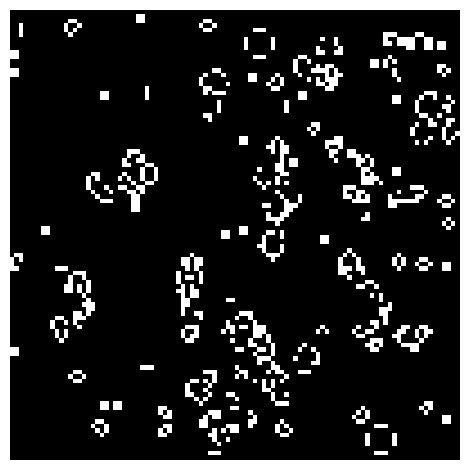

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(lights_history[-1], cmap=plt.cm.gnuplot2)
plt.axis('off')
fig.tight_layout()
plt.show()

# part2

In [8]:
day18_inputs = "inputs/day18.txt"
with open(day18_inputs) as file:
    day18_instructions = file.readlines()

In [9]:
initial_config = [list(row.strip().replace("#", "1").replace(".", "0")) for row in day18_instructions]
initial_config_array = np.array(initial_config)

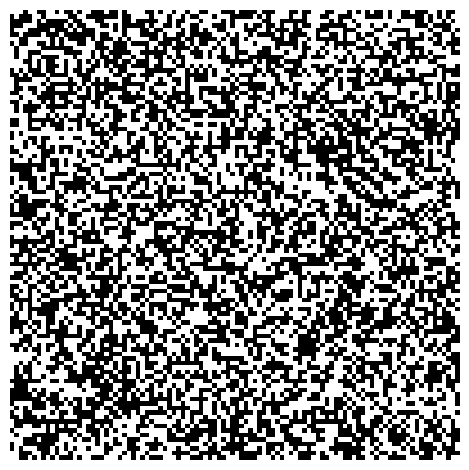

processing step 1
processing step 2
processing step 3
processing step 4
processing step 5
processing step 6
processing step 7
processing step 8
processing step 9
processing step 10
processing step 11
processing step 12
processing step 13
processing step 14
processing step 15
processing step 16
processing step 17
processing step 18
processing step 19
processing step 20
processing step 21
processing step 22
processing step 23
processing step 24
processing step 25
processing step 26
processing step 27
processing step 28
processing step 29
processing step 30
processing step 31
processing step 32
processing step 33
processing step 34
processing step 35
processing step 36
processing step 37
processing step 38
processing step 39
processing step 40
processing step 41
processing step 42
processing step 43
processing step 44
processing step 45
processing step 46
processing step 47
processing step 48
processing step 49
processing step 50
processing step 51
processing step 52
processing step 53
pr

In [10]:
num_steps = 101

lights_shape = initial_config_array.shape
lights_history = np.zeros((num_steps, lights_shape[0], lights_shape[1]))

curr_lights_state = initial_config_array.astype("int")
corner_coords = [[0,0], [0,-1], [-1,0], [-1,-1]]
for coords in corner_coords:
    curr_lights_state[coords[0]][coords[-1]] = 1

lights_history[0] = curr_lights_state

fig, ax = plt.subplots()
im = ax.imshow(curr_lights_state, cmap=plt.cm.gnuplot2)
plt.axis('off')
fig.tight_layout()
plt.show()

for step in range(1, num_steps):
    print(f"processing step {step}")
    curr_lights_state = curr_lights_state.astype(int)
    for i in range(lights_shape[0]):
        for j in range(lights_shape[1]):
            
            
            neighbours = surrounding(curr_lights_state, (i,j), 1).astype(str)
            curr_state = neighbours[1][1]
            neighbours[1][1] = None
            
            unique, counts = np.unique(neighbours, return_counts=True)
            temp_counts = dict(zip(unique, counts))
            neighbours_dict = {str(k):int(v) for k,v in temp_counts.items()}
                
            if "1" not in neighbours_dict:
                neighbours_dict["1"] = 0
                 
            if int(curr_state) == 1 and (neighbours_dict["1"] in [2,3]):
                next_state = 1
            elif int(curr_state) == 0 and neighbours_dict["1"] == 3:
                next_state = 1
            else:
                next_state = 0
            
            lights_history[step][i][j] = next_state
    curr_lights_state = lights_history[step]
    corner_coords = [[0,0], [0,-1], [-1,0], [-1,-1]]
    for coords in corner_coords:
        curr_lights_state[coords[0]][coords[-1]] = 1
    # fig, ax = plt.subplots()
    # im = ax.imshow(curr_lights_state, cmap=plt.cm.gnuplot2)
    # plt.axis('off')
    # fig.tight_layout()
    # plt.show()
    

In [11]:
final_lights_on = np.unique(lights_history[-1], return_counts=True)
print(final_lights_on)

(array([0., 1.]), array([9114,  886]))


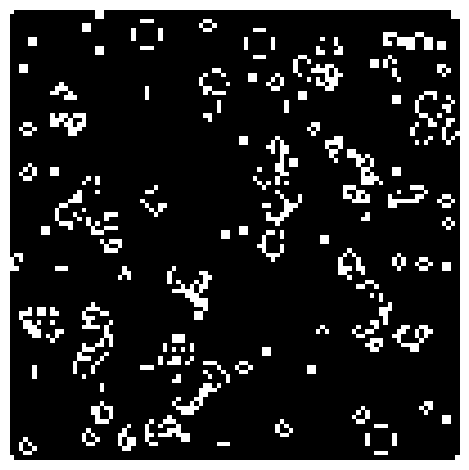

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(lights_history[-1], cmap=plt.cm.gnuplot2)
plt.axis('off')
fig.tight_layout()
plt.show()